<a href="https://colab.research.google.com/github/FarrellMinette/Hackathon/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table


project_id = "hackathon-1123-395609"
data = "hackhathon_data"
tables = "hackathon_flow_tables"
table = "Drivers"

project = project_id
# location = '|location|' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [ ]:
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from google.cloud import bigquery
import warnings

# Suppress deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

client = bigquery.Client(project=project_id)

# Construct the table reference
table_ref = "hackathon-1123-395609.hackathon_flow_tables.Drivers"

# Fetch the data from the table
query = f"SELECT * FROM {table_ref}"
df = client.query(query).to_dataframe()

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

scaler = StandardScaler()
df_stand_norm = pd.DataFrame(scaler.fit_transform(df_normalized), columns=df_normalized.columns)

columns_to_include = ['TotalClaimsCost','NumberOfClaims','IdleRatio','AverageDistPerStop','dangerousTimes','DangerousAreas','SpeedPenalty','BrakingPenalty','AccelerationPenalty','CornerSpeeding']
data = df_stand_norm[columns_to_include]

KeyError: ignored

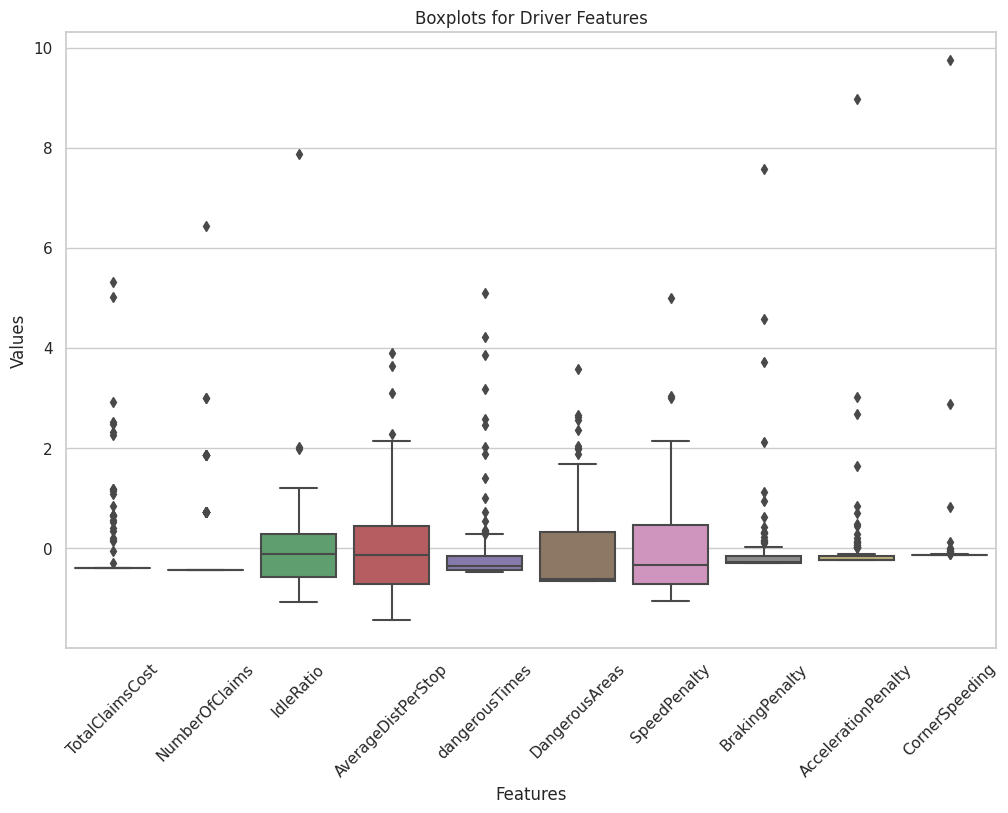

<ipython-input-105-13247f364abb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'SpeedPenalty'] = data['SpeedPenalty'] * 1.5
<ipython-input-105-13247f364abb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'dangerousTimes'] = data['dangerousTimes'] * 1.2
<ipython-input-105-13247f364abb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [ ]:
# Show combined boxplots before and after standardised
import seaborn as sns

# Create a combined boxplot for all variables and save it as an image
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
sns.boxplot(data=data)

# Set a title and labels
plt.title("Boxplots for Driver Features")
plt.xlabel("Features")
plt.ylabel("Values")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
plt.show()


# Apply weights:
data.loc[:,'SpeedPenalty'] = data['SpeedPenalty'] * 1.5
data.loc[:,'dangerousTimes'] = data['dangerousTimes'] * 1.2

In [ ]:
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates

# Perform K-means clustering with k=3
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
data["cluster"] = kmeans.fit_predict(data)
df["cluster"] = kmeans.fit_predict(data)

# Set up the figure and create the parallel coordinate plot
plt.figure(figsize=(12, 6))
parallel_coordinates(
    data,
    "cluster",
    color=("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"),
)

# Add legend and adjust layout
plt.legend(title="Cluster")
plt.title(f"Parallel Coordinate Plot of Clusters (k={k})")
plt.xlabel("Features")
plt.ylabel("Standardized Values")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


ValueError: ignored

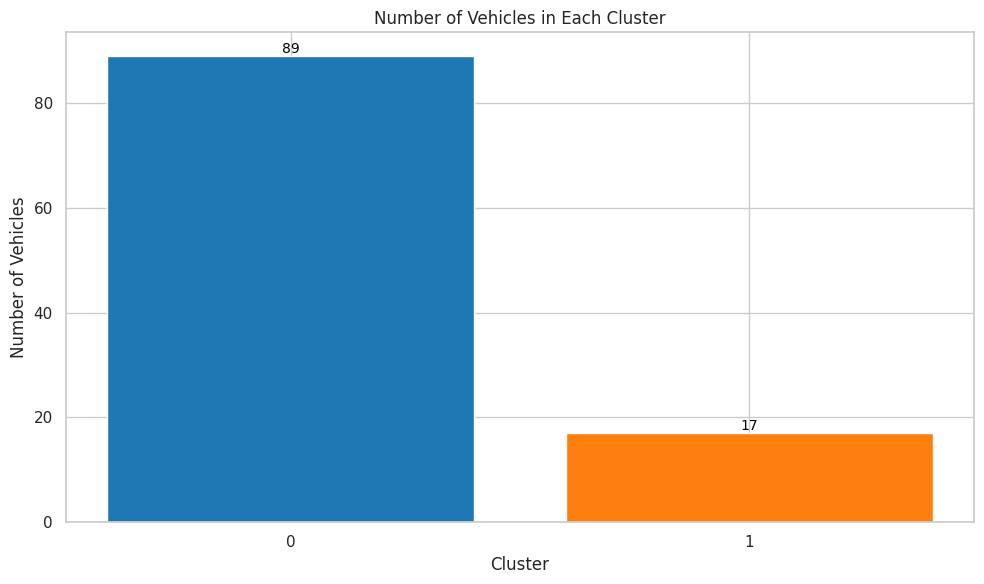

     VehicleID  cluster ClusterLabel
0    203444726        0         good
1    155517428        0         good
2    129073905        0         good
3    140138339        0         good
4    139599033        0         good
..         ...      ...          ...
101  169912702        0         good
102  165073375        0         good
103   96544022        1          bad
104   87055861        1          bad
105   90293012        1          bad

[106 rows x 3 columns]


<ipython-input-111-443d5ac97462>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['ClusterLabel'] = subset['cluster'].apply(map_cluster_to_label)


In [ ]:

import pandas as pd
import random
# Assuming your DataFrame has a "cluster" column
cluster_column = 'cluster'


# Define the number of bins for the histogram
num_bins = 20

# Set up the figure and axes
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Count the number of vehicles in each cluster
vehicle_counts = df[cluster_column].value_counts()

# Generate random colors for the bars
bar_colors = ["#1f77b4", "#ff7f0e"]

# Create a histogram of vehicle counts per cluster
plt.bar([0, 1], vehicle_counts.values, color=bar_colors)
bars = plt.bar([0, 1], vehicle_counts.values, color=bar_colors)
plt.xticks([0, 1], vehicle_counts.index)
plt.xlabel("Cluster")
plt.ylabel("Number of Vehicles")
plt.title("Number of Vehicles in Each Cluster")
plt.tight_layout()

for bar, count in zip(bars, vehicle_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             va="bottom", ha="center", fontsize=10, color="black")

# Show the histogram
plt.show()

# Assuming df_stand_norm is your DataFrame
selected_columns = ['VehicleID', 'cluster']
subset = df[selected_columns]

# Define a function to map cluster values to labels
def map_cluster_to_label(cluster_value):
    if cluster_value == 1:
        return "bad"
    elif cluster_value == 0:
        return "good"
    else:
        return "unknown"

# Apply the mapping function to the 'cluster' column and create a new 'ClusterLabel' column
subset['ClusterLabel'] = subset['cluster'].apply(map_cluster_to_label)

print(subset)